We've worked with a number of functions. Some are base R functions, like the following:

* sum()
* min()
* max()
* mean()

Some of the functions we've worked with are part of packages:

* select()
* filter()
* arrange()
* mutate()

All the functions we've seen so far have been written by someone else, and are useful for performing common data manipulation tasks.

However, if the operation we need to repeat is specific to our workflow, we can't count on a function existing in base R or in a user-contributed package.

This is where the ability to write our own functions will be necessary.

In this file, we'll write custom functions to analyze FiveThirtyEight's [data](https://www.kaggle.com/fivethirtyeight/world-cup) on the [2014 FIFA World Cup](https://en.wikipedia.org/wiki/2014_FIFA_World_Cup).

Let's load the data, "scores.csv" into R 

`library(readr)
scores <- read_csv("scores.csv")`

Pre-written R functions are written in a compiled language (like Fortran or C) and have an R "wrapper" that users interact with.

In R, functions have several components:

* **Body**: The code inside the function.

* **Arguments**: The list of inputs that control how we call the function. Arguments include the data to compute on and the computational details, such as omitting missing values.

* **Environment**: The location (such as the global environment) where the function was created. This is the location where, when a function is called, R finds the values associated with it.

To illustrate a function's body and arguments, let's write a simple function to add three to a variable:

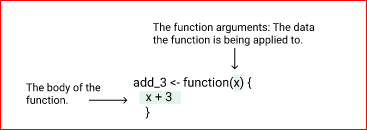

In this example, the `add_3()` function arguments consist only of `x`, which represents the data input. The body of the function is `x + 3`.

By default, the value returned by a function will be whatever the output of the last line that got executed is. If we want to manually specify that R should return something else, such as multiple objects, we can use `return()` in our function. 

The name of the function above is `add_3`. The name we choose for our function should be informative.

When we call a function, the function executes in its own local environment which consists of a temporary copy of everything in the global environment plus whatever data was passed to the function as arguments. When the function finishes executing, the returned value is placed in the environment we called the function in, and the function's local environment is discarded.

To call the `add_3()` function on a value, we would write:

`add_3(x = 4)`

`7`

When we apply a function to data, we do not need to designate input variables using `x =`. We can simply write:

`add_3(4)`

However, specifying the variables can be a good way to keep track of data inputs, as we will see when we write functions with more than one argument.

We can also call the `add_3()` function on a vector, such as the `home_goals` variable of the `scores` data frame:

`add_3(x = scores$home_goals)`

`30 10 10 30 30 10 10 20 30 20 40 10 20 10  0  0  0 20 20  0 20  0 20 10 10 20 20 10 10 10 0 20 10 20  0  0  0  0 20 30 20  0 10 10 20 20 10 20 20 10 20 20  0  0 10 10  0  0 10`

Note that, in R, functions are objects. Once created, they are stored in the environment we created them in.

**Task**

* Write a function to multiply `x` by 100 and give it a descriptive name.
* Call our function on the `away_goals` variable of the `scores` data frame.

**Answer**

`mult_by_100 <- function(x) {
  x * 100
}`

`away_by_100 <- mult_by_100(scores$away_goals)`

If we wanted to calculate the proportion of all goals scored in 2014 that were scored during each match, we could write the following code:

`scores$home_goals/sum(scores$home_goals) # home team`

`scores$away_goals/sum(scores$away_goals) # away team`

In the example above, we would need to copy and paste lines of code while making minor changes (just the words "home" and "away"). This approach is time-consuming and prone to typing errors.

Instead of writing out the calculation multiple times, we could write a function.

When we write a function, it helps to think about performing the operation on a single element. Let's consider the proportion of 2014 World Cup `away_goals` scored during the first match:

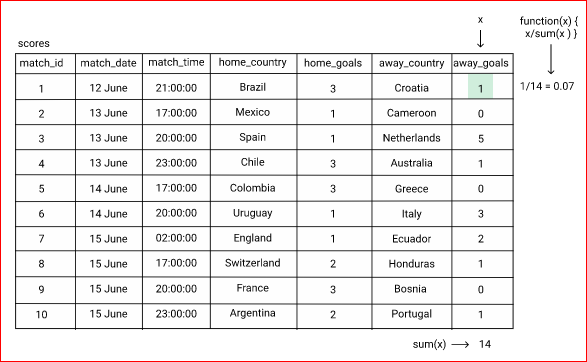

For the data frame in the diagram above, to calculate the proportion of total away goals scored by the away team in match one, we would perform the calculation:

`1/14`

Next, think about the inputs to the function. In this case, there is only one — the number of goals scored. We will call the variable argument `x`.

`x/sum(x)`

Once we've verified the code works, we can create the function. Use the syntax we learned earlier and assign the function a name:

`proportion_of_total <- function(x) {
  x/sum(x)
}`

Now, we can apply the function to our variables of interest:

`proportion_of_total(scores$home_goals)
proportion_of_total(scores$away_goals)`


`home_goals_prop <- proportion_of_total(scores$home_goals)
away_goals_prop <- proportion_of_total(scores$away_goals)`


Some instances require a function with multiple variables. For example, if we wanted to calculate the proportion of total goals scored by a team in a given match, we would need to write a function with two variables as arguments:home_goals and away_goals.

To calculate the proportion of total goals scored by the home team in the first match, we would perform the calculation:

`home_goals/(home_goals + away_goals)`

To write the multivariable function, we can use the same syntax.

`proportion <- function(x,y) {
  xy_total = x + y  
  (x/xy_total)
}`

If our global environment happened to already contain a variable called `xy_total`, it would not be affected by executing this function.

To apply the function to the `home_goals` and `away_goals` variables, we would write:

`proportion(x = scores$home_goals, y = scores$away_goals)`

`proportion(x = scores$away_goals, y = scores$home_goals)`

When we use above function to calculate the proportion of total goals scored by the home team for each match, we get the following output:

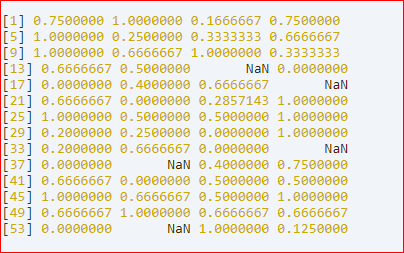

Notice the presence of the `NaNs`. `NaN` stands for "not a number", and here, it is the result of division by zero when neither team scored any goals. For example, no goals were scored by either team during the 17th match:

`match_id  home_country home_goals away_country away_goals 
17          Brazil          0        Mexico         0`

In mathematics, dividing by zero is not possible. Therefore, R cannot return a numeric value.

Let's say that, for matches where the total number of goals scored is zero, we want our proportion() function to return `0` instead of `NaN`. We can include if-else statements in our functions to specify different actions depending on outcomes.

We'll start with the if-else statement:

`if(x + y > 0) {
  xy_total = x + y 
  (x / xy_total) 
} else {
  0
}`

It's a good idea to plug values for one match into the if-else statement to make sure our code is correct. 

Next, we can write the function:
    
`proportion_no_na <- function(x,y) {
  if(x + y > 0) {
    xy_total = x + y 
    (x / xy_total) 
  } else {
    0
  }
}`

Note that when we write functions for conditional execution, we can't call them on **vectors**

`percentage_no_na(x = scores$away_goals[15], y = scores$home_goals[15])`

Later we'll learn some alternatives to for-loops for applying a function to all elements of a vector or list.

We've learned to write functions that take one or two variables as arguments. However, functions can take any number of variables as arguments.

Let's say a friend who compiled the data made some errors and We'll need to fix them.

* The `home_goals` variable has had an extra goal added for the first twenty matches (`match_id <= 20`).
* The `away_goals` variable has one goal too few for the rest of the matches (`match_id > 20`).

The variables we'll need as arguments are:

* match_id (x)
* home_goals (y)
* away_goals (z)

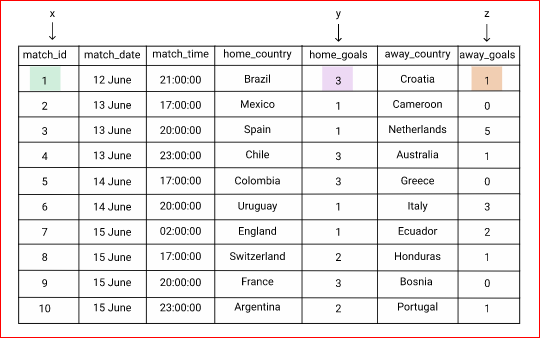

We have two actions to perform: subtracting one from `home_goals (y)` and adding one to `away_goals (z)`.

`y - 1
z + 1`

Finally, we can write a function:

`adjust_yz <- function(x,y,z) {
  if (x <= 20) {
    y - 1 
  } else {
    z + 1
  }
}`

Let's try the function for a match with `match_id` greater than twenty. For match 30, the function should add one to the `away_goals` value of three:

`adjust_yz(scores$match_id[30], scores$home_goals[30], scores$away_goals[30])`

`4`

As expected, the result is four.